# IRIS CLASSIFICATION PROBLEM

## Data

The dataset has been downloaded from kaggle.

URL - https://www.kaggle.com/datasets/saurabh00007/iriscsv

## Features

1. Sepal Length.
2. Sepal Width.
3. Petal Length.
4. Petal Width.
5. Species ( Target Variable).

The target variable consists of 3 species :-
1. Iris-setosa.
2. Iris-versicolor
3. Iris-virginica.

## Objective

Our objective is to take the measurements of the Iris species as input data and train a Machine Learning model that can learn from the measurements of the Iris species and classify them accordingly.

## Evaluation Metric

For classification problems, accuracy is used as the evaluation metric.

## Preparing toolkits

In [644]:
# importing EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint

# modelling libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn metrics for evaluation and hyperparamater tuning.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [522]:
# Loading the dataset from PC
df = pd.read_csv("C:\\Users\\kenka\\OneDrive\\Desktop\\OASIS\\dataset.csv", index_col=0)

In [505]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [97]:
df.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
       dtype='int64', name='Id', length=150),
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [355]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [356]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [357]:
len(df)

150

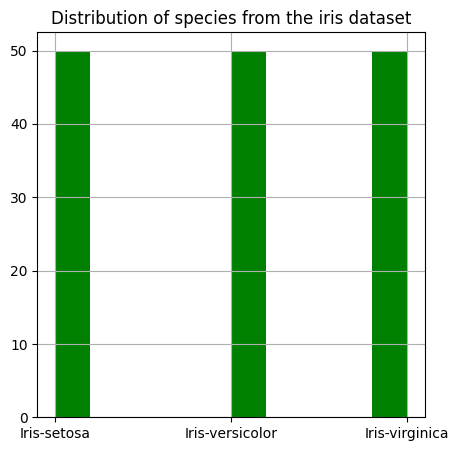

In [358]:
# Checking distribution of target
df["Species"].hist(figsize=(5, 5), color ="green");
plt.title("Distribution of species from the iris dataset")
plt.show()

In [359]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### From the above datas, we can infer that the total number of data points in the iris dataset is 150 and all the species are evenly distributed (50 each).

## Check for null values and duplicates

In [513]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [514]:
df.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
       dtype='int64', name='Id', length=150),
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [524]:
# Removing the id field from Index
df.reset_index(drop=True, inplace=True)

In [525]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [526]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [527]:
df.duplicated().sum()

3

In [529]:
# Removing the duplicate values and keep the first one alone.
df.drop_duplicates(keep="first", inplace=True)

In [530]:
df.duplicated().sum()

0

In [531]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Note: If index 'Id' is not removed, the dimensions of the sample dataset (X and Y) will be inconsistent during model training.

## Basic Descritive statistics

In [532]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [533]:
df.shape

(147, 5)

## Distribution of individual features and targets.

In [534]:
df["SepalLengthCm"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 147, dtype: float64

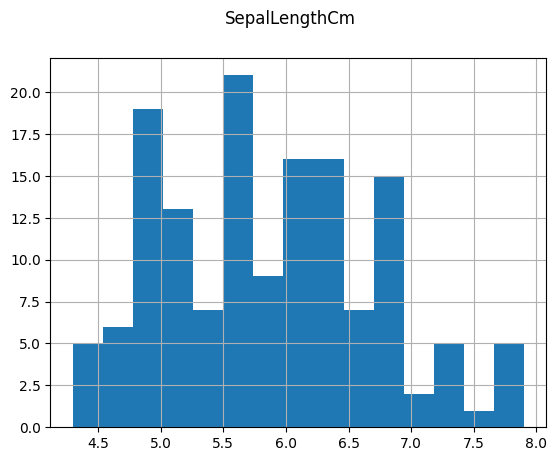

In [535]:
col="SepalLengthCm"
df[col].hist(histtype="bar", bins=15)
plt.suptitle(col)
plt.show()

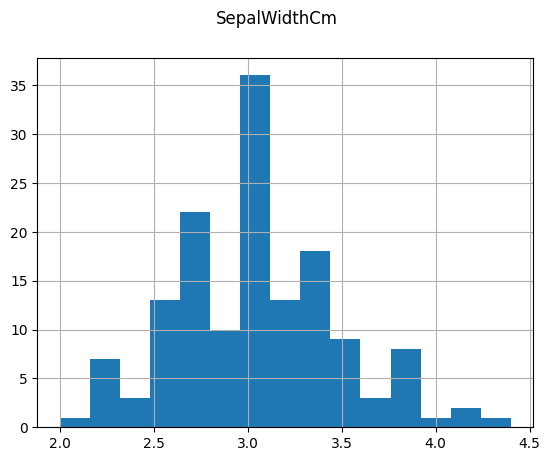

In [536]:
col="SepalWidthCm"
df[col].hist(histtype="bar", bins=15)
plt.suptitle(col)
plt.show()

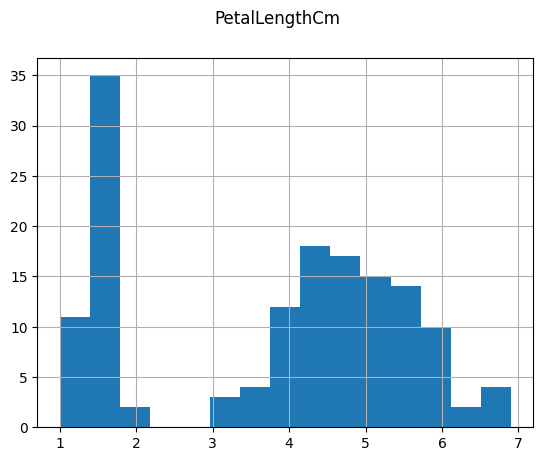

In [537]:
col="PetalLengthCm"
df[col].hist(histtype="bar", bins=15)
plt.suptitle(col)
plt.show()

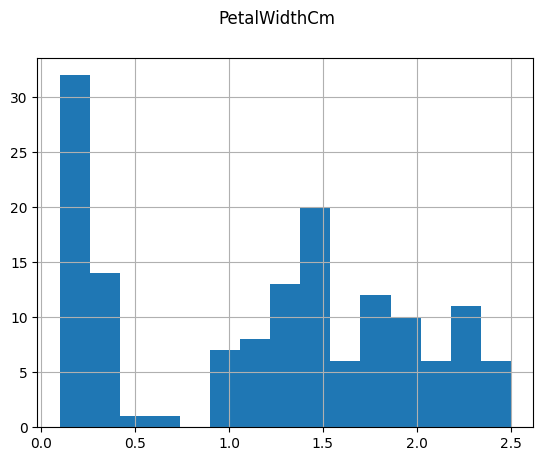

In [538]:
col="PetalWidthCm"
df[col].hist(histtype="bar", bins=15)
plt.suptitle(col)
plt.show()

## Relationship between features and species.

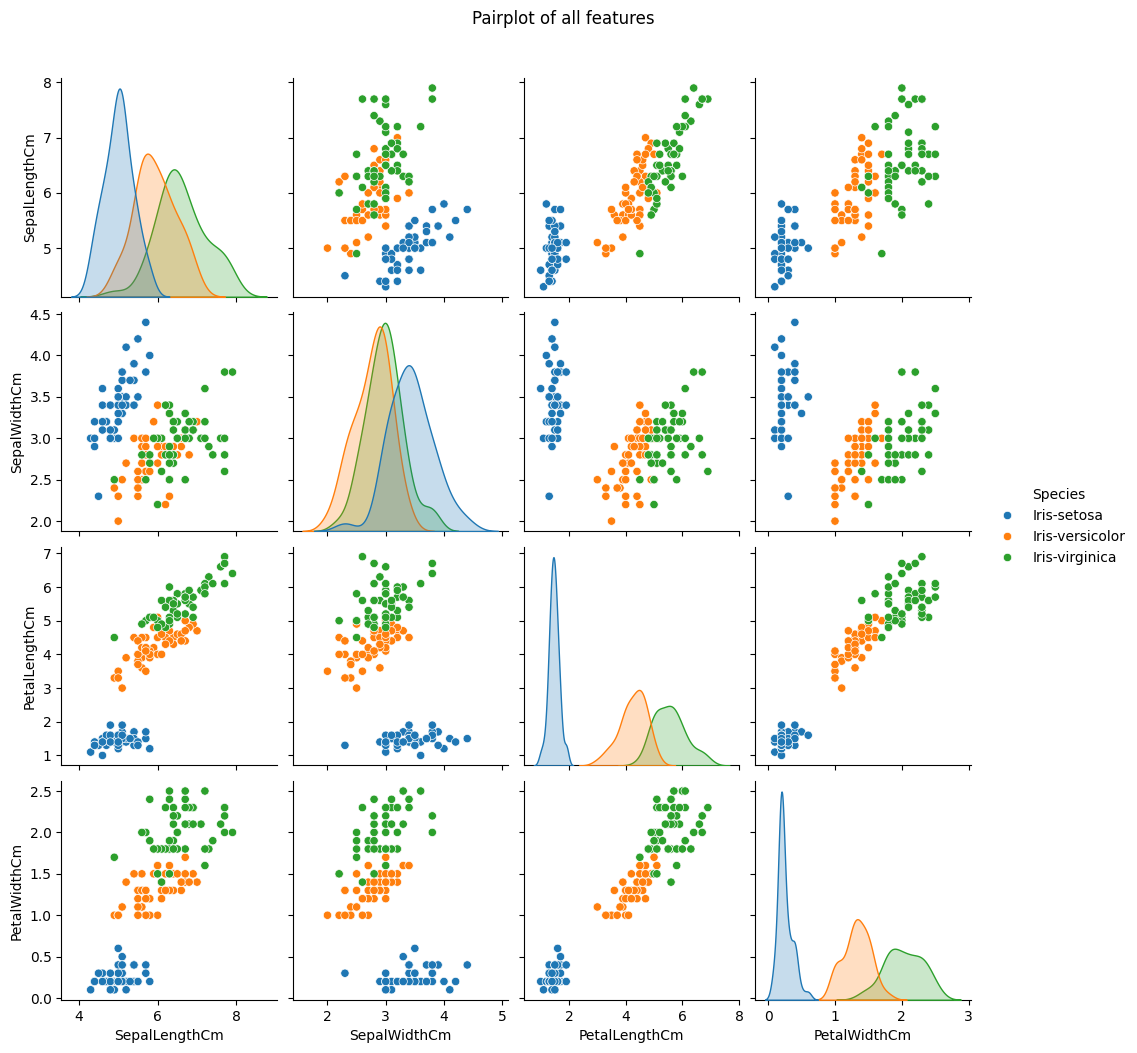

In [539]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data = df , hue = 'Species')
plt.suptitle("Pairplot of all features", y=1.05)
plt.show()

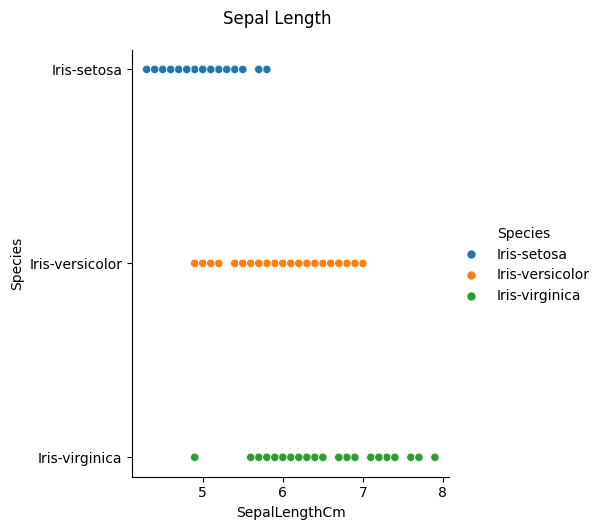

In [540]:
# Comparing sepal length to the species.
sns.relplot(x="SepalLengthCm", y="Species", hue="Species", data=df)
plt.suptitle("Sepal Length", y=1.05)
plt.show()

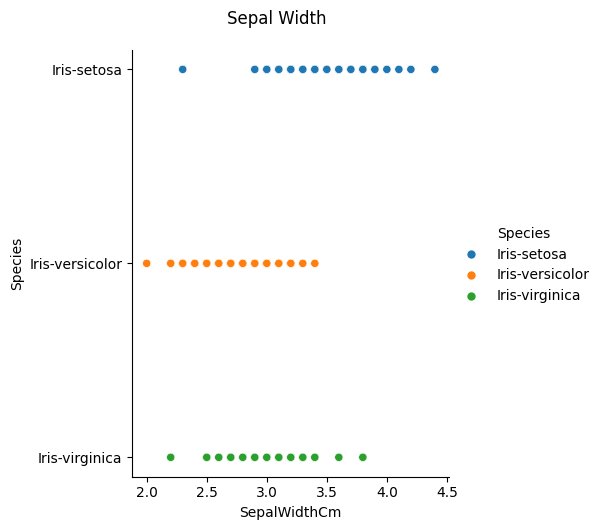

In [541]:
# Comparing sepal width to the species
sns.relplot(x="SepalWidthCm", y="Species", hue="Species", data=df)
plt.suptitle("Sepal Width", y=1.05)
plt.show()

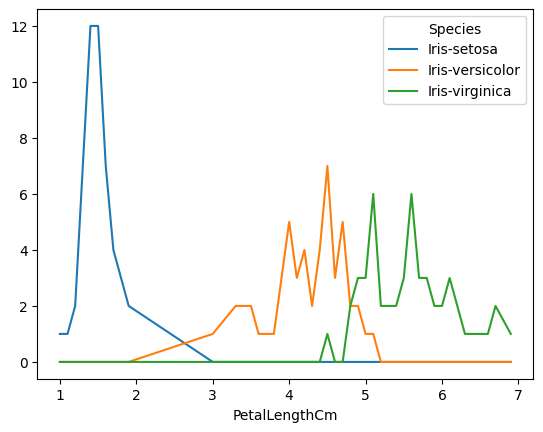

In [542]:
# Comparing petal length to the species.
pd.crosstab(df["PetalLengthCm"], df["Species"]).plot()
plt.show()

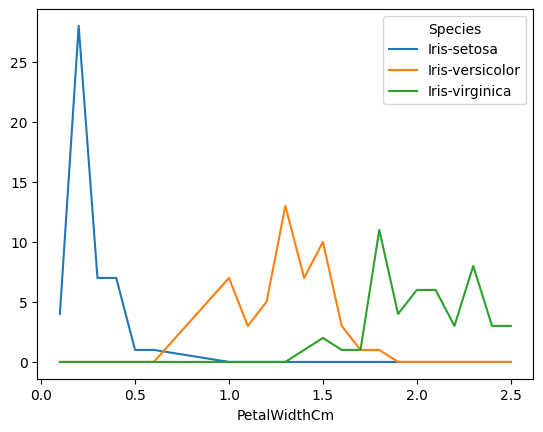

In [543]:
# Comparing petal width to the species.
pd.crosstab(df["PetalWidthCm"], df["Species"]).plot()
plt.show()

## Overall distribution of the dataset

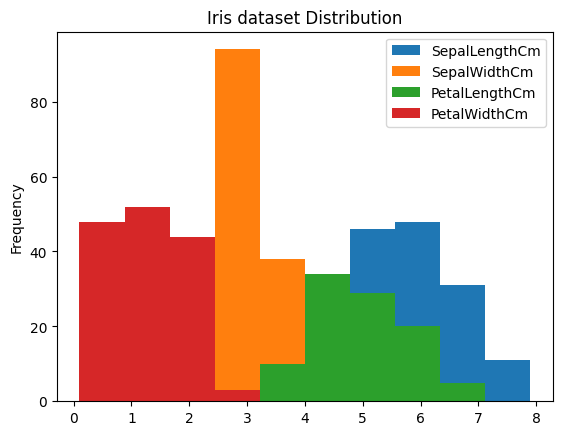

In [544]:
df.plot(kind = 'hist')
plt.title("Iris dataset Distribution")
plt.show()

## Modelling

In [545]:
x = df.drop("Species", axis=1)
y = df["Species"]

In [583]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [582]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [548]:
x.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [584]:
y.dtypes

dtype('O')

In [585]:
# CONVERTING THE OBJECT TYPE TO NUMERIC USING MAP FUNCTION. 
ty=y.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [586]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [587]:
ty

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int64

In [588]:
x_train, x_test, y_train, y_test = train_test_split(x, ty, test_size=0.20, random_state=42)

In [589]:
x.shape

(147, 4)

In [590]:
ty.shape

(147,)

In [591]:
x_train.shape

(117, 4)

In [592]:
x_test.shape

(30, 4)

In [593]:
y_train.shape

(117,)

In [594]:
y_test.shape

(30,)

In [595]:
len(x_train), len(y_train), len(x_test), len(y_test)

(117, 117, 30, 30)

In [596]:
# MODEL 1 - LOGISTIC REGRESSION

model = LogisticRegression()
model.fit(x_train,y_train)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 0.9829059829059829
Test score = 0.9333333333333333


In [597]:
# MODEL 2 - KNN
# Test done with n ranging from 1-9.

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print(i," - Test score =",model.score(x_test,y_test))

1  - Test score = 0.9333333333333333
2  - Test score = 0.9333333333333333
3  - Test score = 0.9333333333333333
4  - Test score = 0.9333333333333333
5  - Test score = 0.9333333333333333
6  - Test score = 0.9333333333333333
7  - Test score = 0.9333333333333333
8  - Test score = 0.9
9  - Test score = 0.9


In [642]:
# MODEL 3 - RANDOM FOREST CLASSIFIER

model = RandomForestClassifier()
model.fit(x_train,y_train)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 1.0
Test score = 0.9333333333333333


## Prediction

In [609]:
# Predictions will be done for Random Forest Classifier model since it shows similar or better results.

model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)

In [610]:
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0], dtype=int64)

In [611]:
y_test

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: Species, dtype: int64

In [612]:
# Confusion matrix

confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [643]:
# Calculating accuracy score.

score = accuracy_score(y_test, y_pred)  
print(score)

0.9333333333333333


## Hyperparameter Tuning

In [638]:
# We'll use RandomizedSearchCV to go through the list of parameters and choose a best one.

param_dist = {'n_estimators': [10,20,30,40,50,60,70,80,90,100,200],'max_depth': [2,5,10,12,15,18,20,22,25,28,30,33,35,37,40]}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 70, 'max_depth': 35}


In [646]:
model = RandomForestClassifier(n_estimators=70, max_depth=35)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 1.0
Test score = 0.9333333333333333


### The test score is the same as before even after tuning hence we'll end here.